<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Big_mart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np

# read the train and test dataset
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

full_data = pd.concat([train_data, test_data], sort = False)

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)
print('Shape of testing data :',full_data.shape)


Shape of training data : (8523, 12)
Shape of testing data : (5681, 11)
Shape of testing data : (14204, 12)


In [85]:
# Find total number of missing values in the full data file
full_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [86]:
full_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [87]:
full_data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [88]:
full_data['Item_Weight'].dtype # data type is floating point numbers

dtype('float64')

In [89]:
full_data['Outlet_Type'].dtype # data type is an object
# Separate out the categorical variables based on object data type and find out the frequencies of value counts

dtype('O')

In [90]:
full_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [91]:
categ_variables = [x for x in full_data.dtypes.index if full_data.dtypes[x] == 'object']

categ_variables = [x for x in categ_variables if x not in ['Item_Identifier', 'Outlet_Identifier']] # remove IDs which are of no use

categ_variables

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [92]:
for column in categ_variables:
  print(full_data[column].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [93]:
import numpy as np
# Finding the average weight of each item using pivot tables
# Imputing the Missing Values in Item weight and outlet size variables

item_weight_avg = full_data.pivot_table(values = "Item_Weight", index = "Item_Identifier", aggfunc = np.mean)
item_weight_avg.head(10)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [94]:
miss_boolean = full_data["Item_Weight"].isna()
miss_boolean.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: Item_Weight, dtype: bool

In [0]:
full_data.loc[miss_boolean,"Item_Weight"] #locates the missing values in item_weight
full_data.loc[miss_boolean,"Item_Weight"] = full_data.loc[miss_boolean,"Item_Identifier"].apply(lambda x: item_weight_avg.loc[x]) # Replace nan in item weight with avg of each item

In [96]:
sum(full_data['Item_Weight'].isna())

0

In [97]:
from scipy.stats import mode
# Calculate mode of outlet size based on outlet type
outlet_size_mode = full_data.pivot_table(values = "Outlet_Size", index = "Outlet_Type", aggfunc = (lambda x: mode(x).mode[0]))
outlet_size_mode

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [0]:
# impute the missing values in outlet size with mode of outlet size
miss_boolean = full_data['Outlet_Size'].isna()
full_data['Outlet_Size'].fillna(lambda x: outlet_size_mode.loc[x], inplace = True)

In [99]:
sum(full_data['Outlet_Size'].isna())

0

In [100]:
# Feature Engineering
full_data.pivot_table(values = "Item_Outlet_Sales", index = "Outlet_Type") # cannot combine type 2 and type 3 as there is huge gap in sales

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [101]:
# combine items with same meaning in item fat content
full_data['Item_Fat_Content'] = full_data['Item_Fat_Content'].replace({'reg': "Regular", 'low fat': "Low Fat", 'LF' : "Low Fat"})
full_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [102]:
# Reduce the item types based on item IDs
full_data['item_type_mod'] = full_data['Item_Identifier'].apply(lambda x: x[0:2])
full_data['item_type_mod'].head(5)

0    FD
1    DR
2    FD
3    FD
4    NC
Name: item_type_mod, dtype: object

In [103]:
full_data['item_type_mod'] = full_data['item_type_mod'].replace({'FD':'Food','NC':'Non Consumables','DR':'Drinks'}) # .replace() or .map() function does the same
full_data['item_type_mod'].value_counts() 

Food               10201
Non Consumables     2686
Drinks              1317
Name: item_type_mod, dtype: int64

In [104]:
# Create a variable indicating the age of a store
full_data['Outlet_oldness'] = 2013 - full_data['Outlet_Establishment_Year']
full_data['Outlet_oldness'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_oldness, dtype: float64

In [105]:
# remove item fat content for non consumbles
full_data.loc[full_data['item_type_mod'] == 'Non Consumables', 'Item_Fat_Content'] = "Non Edible"
full_data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non Edible    2686
Name: Item_Fat_Content, dtype: int64

In [106]:
sum(full_data['Item_Visibility'] == 0)

879

In [0]:
# modify item visibility of 0 to avg of particular product
item_visibility_mod = full_data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')

item_visibility_zeros = (full_data['Item_Visibility'] == 0)

full_data.loc[item_visibility_zeros, 'Item_Visibility'] = full_data.loc[item_visibility_zeros, 'Item_Identifier'].apply(lambda x: item_visibility_mod.loc[x])

In [108]:
sum(full_data['Item_Visibility'] == 0)

0

In [109]:
item_visibility_mod.head(5)

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [0]:
# One hot encoding of Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

full_data['Outlet'] = le.fit_transform(full_data['Outlet_Identifier'])
categ_variables = ['Item_Fat_Content','Outlet_Type','item_type_mod','Outlet','Outlet_Location_Type']

for i in categ_variables:
  full_data[i] = le.fit_transform(full_data[i])

In [0]:
full_data = pd.get_dummies(full_data, columns = ['Item_Fat_Content','Outlet_Type','item_type_mod','Outlet','Outlet_Location_Type'])
full_data.dtypes

In [115]:
full_data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


<BarContainer object of 8523 artists>

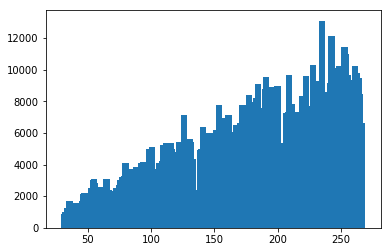

In [112]:
import matplotlib.pyplot as plt

plt.bar(train_data['Item_MRP'], train_data['Item_Outlet_Sales'], width = 5)

<BarContainer object of 8523 artists>

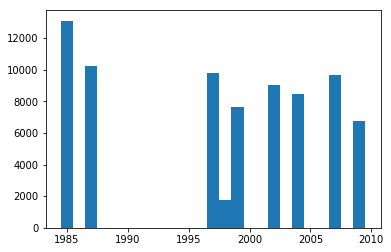

In [113]:
plt.bar(train_data['Outlet_Establishment_Year'], train_data['Item_Outlet_Sales'], width = 1)

<BarContainer object of 8523 artists>

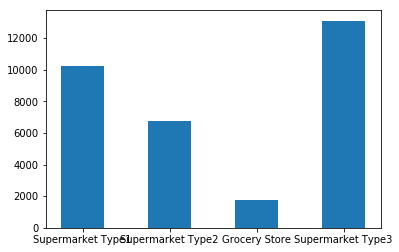

In [114]:
plt.bar(train_data['Outlet_Type'], train_data['Item_Outlet_Sales'], width = 0.5)